In [1]:
import cv2
from PIL import Image

In [2]:
img=cv2.imread("clear_image.jpg",flags=cv2.IMREAD_GRAYSCALE)
img

array([[206, 206, 206, ..., 185, 185, 185],
       [206, 206, 206, ..., 185, 185, 185],
       [206, 206, 206, ..., 186, 185, 185],
       ...,
       [207, 207, 207, ..., 191, 190, 190],
       [207, 207, 207, ..., 191, 190, 190],
       [207, 207, 207, ..., 191, 191, 190]], dtype=uint8)

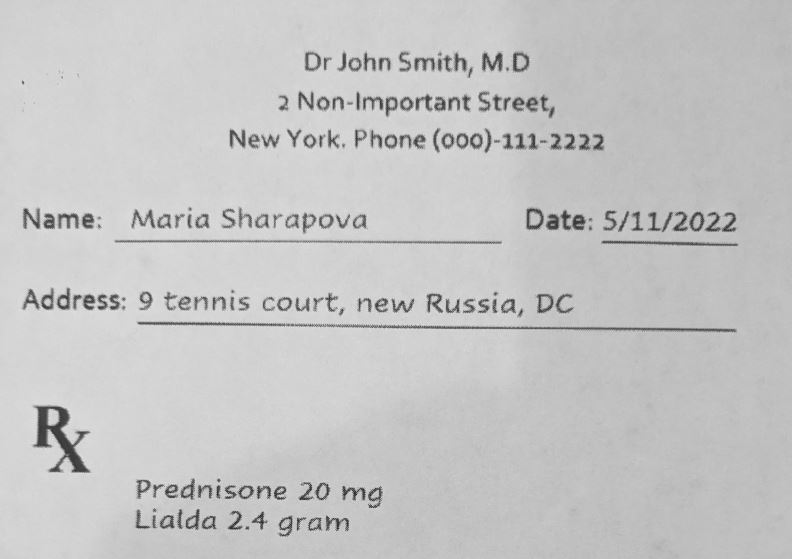

In [3]:
Image.fromarray(img)

In [16]:
_,new_img=cv2.threshold(img,160,255,cv2.THRESH_BINARY)
new_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

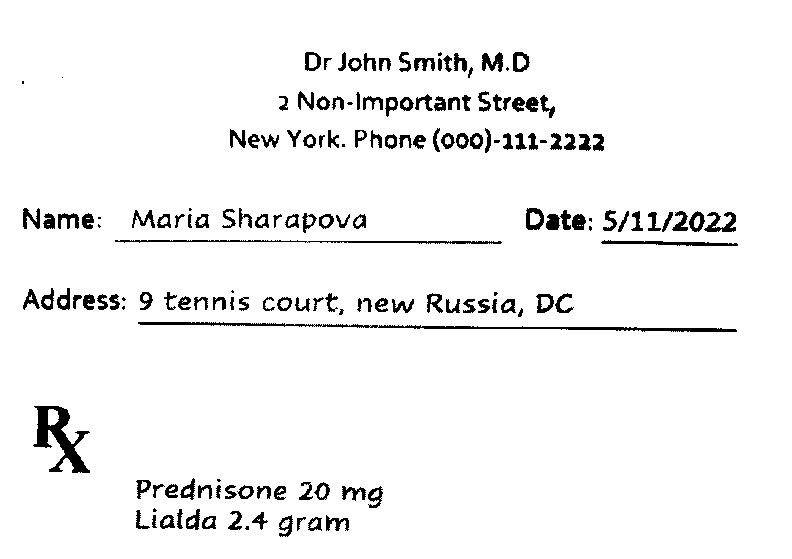

In [17]:
Image.fromarray(new_img)

In [34]:
dark_img=cv2.imread("dark_image.jpg",cv2.IMREAD_GRAYSCALE)

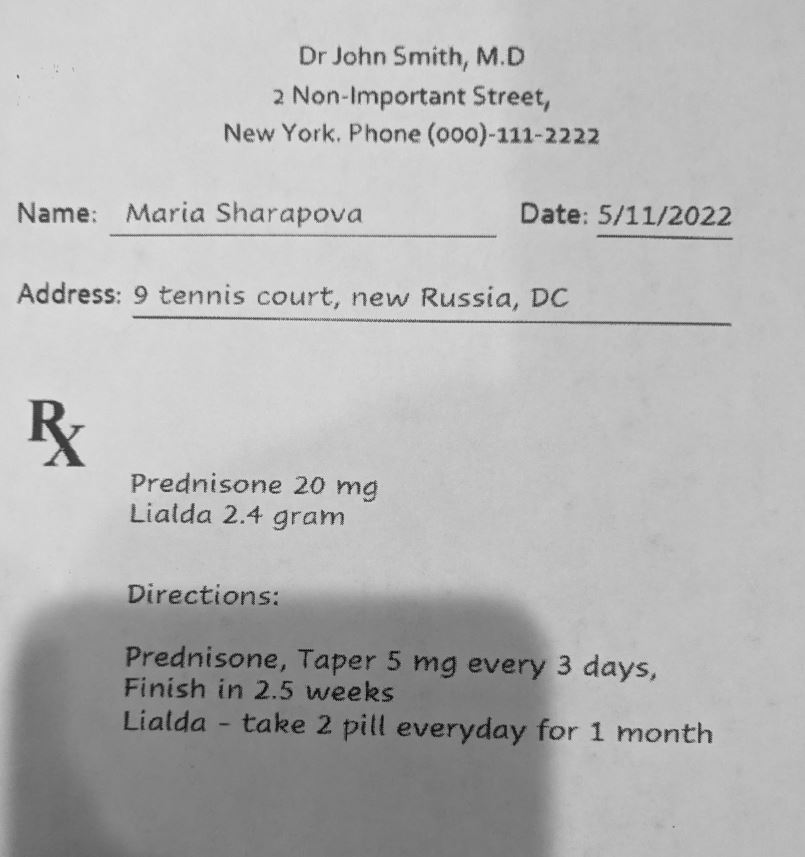

In [35]:
Image.fromarray(dark_img)

In [36]:
_,new_img_dark=cv2.threshold(dark_img,120,255,cv2.THRESH_BINARY)
new_img_dark

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

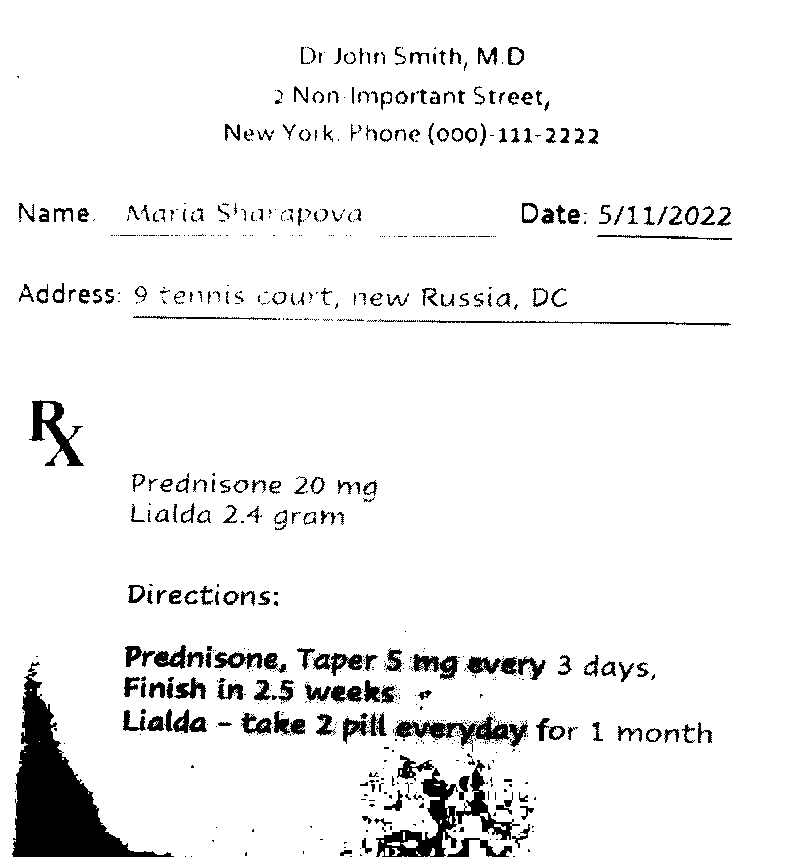

In [27]:
Image.fromarray(new_img_dark)

In [38]:
# adaptive threshold
new_img_dark=cv2.adaptiveThreshold(
    dark_img,255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    61,
    11
)
new_img_dark

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

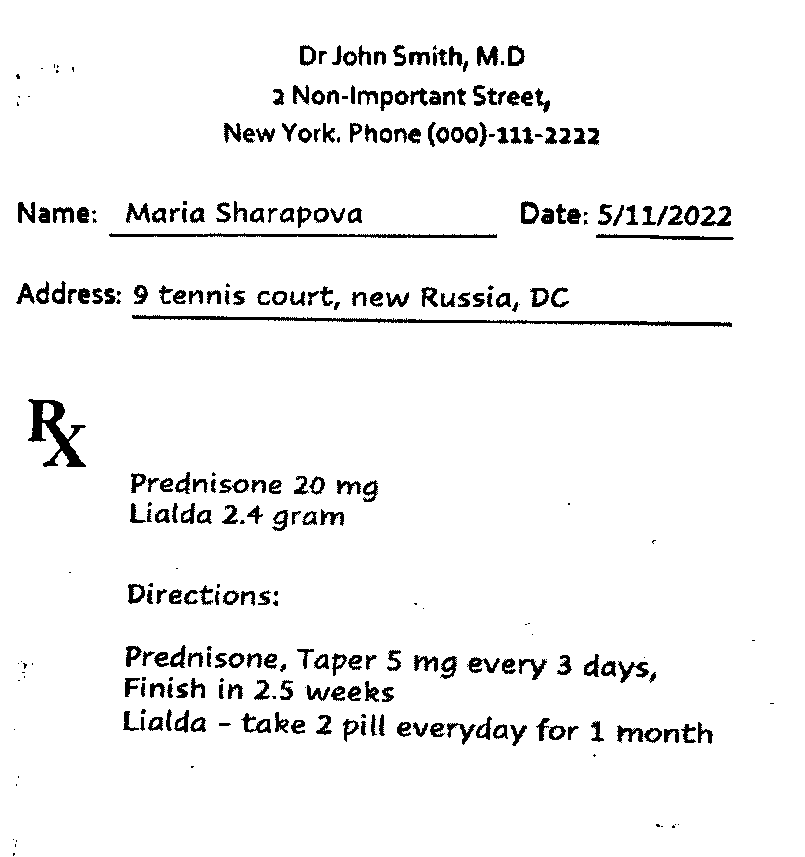

In [40]:
Image.fromarray(new_img_dark)

In [41]:
import re

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [54]:
text = "Patient's phone is 7321119999. Bill amount is 120$ doctor's phone is (732)-242-9910"
pattern='\d+'

In [45]:
match=re.findall(pattern,text)

In [47]:
match


['7321119999', '120']

## 10 digit ph no

In [48]:
pattern='\d{10}'

In [49]:
ph_no=re.findall(pattern,text)

In [50]:
ph_no

['7321119999']

## (xxx)-xxx-xxxx

In [55]:
pattern="\(\d{3}\)-\d{3}-\d{4}| \d{10}"

In [56]:
ph_no=re.findall(pattern,text)

In [57]:
ph_no

[' 7321119999', '(732)-242-9910']

## grouping

In [79]:
pattern="(\d{10})[^0-9]+(\d+)\$"
#or
pattern="(\d{10})\D+(\d+)\$"

In [80]:
match=re.search(pattern,text)
match.groups()

('7321119999', '120')

In [81]:
phno,bill=match.groups()

In [82]:
phno,bill

('7321119999', '120')

In [88]:
name="Name:(.*)Date:"
add="Address:(.*)\n"

In [111]:
text='''Dr John Smith, M.D
2 Non-Important Street,
New York, Phone (000)-121-2222

Name: Marta Sharapova Date: 2/11/2022

Address: 9 tennis court, new Russia, DC



Prednisone 20 mg
Lialda 2.4 gram

Directions:
Prednisone, Taper 5 mg every 3 days,

Finish in 2.5 weeks -
Lialda - take 2 pill everyday for 1 month

Refill: 2 times'''

In [121]:
match=re.findall(name,text)
match

[' Marta Sharapova ']

In [123]:
match[0].strip()

'Marta Sharapova'

In [126]:
add_match=re.findall(add,text)
add_match[0].strip()

'9 tennis court, new Russia, DC'

## medicines

In [113]:
pattern="Address:[^\n]*(.*)Directions:"
match=re.findall(pattern,text,flags=re.DOTALL)

print(match[0].strip())

Prednisone 20 mg
Lialda 2.4 gram


## directions

In [114]:
pattern="Directions:[\n](.*)Refill:"
match=re.findall(pattern,text,flags=re.DOTALL)

print(match[0].strip())

Prednisone, Taper 5 mg every 3 days,

Finish in 2.5 weeks -
Lialda - take 2 pill everyday for 1 month


## refill times

In [115]:
pattern="Refill:(.\d)"
match=re.findall(pattern,text,flags=re.DOTALL)

print(match[0].strip())

2
